# The Trade data is gathered from Eurostat

https://ec.europa.eu/eurostat/web/international-trade-in-goods

International trade in goods statistics (ITGS) published by Eurostat measure the value and quantity of goods traded between the EU Member States and their trade partners. The data that we've gathered for you contain the import of three goods:
- Sunflower oil
- Maize corn
- Wheat






### Download Screen

https://ec.europa.eu/eurostat/web/international-trade-in-goods/data/database

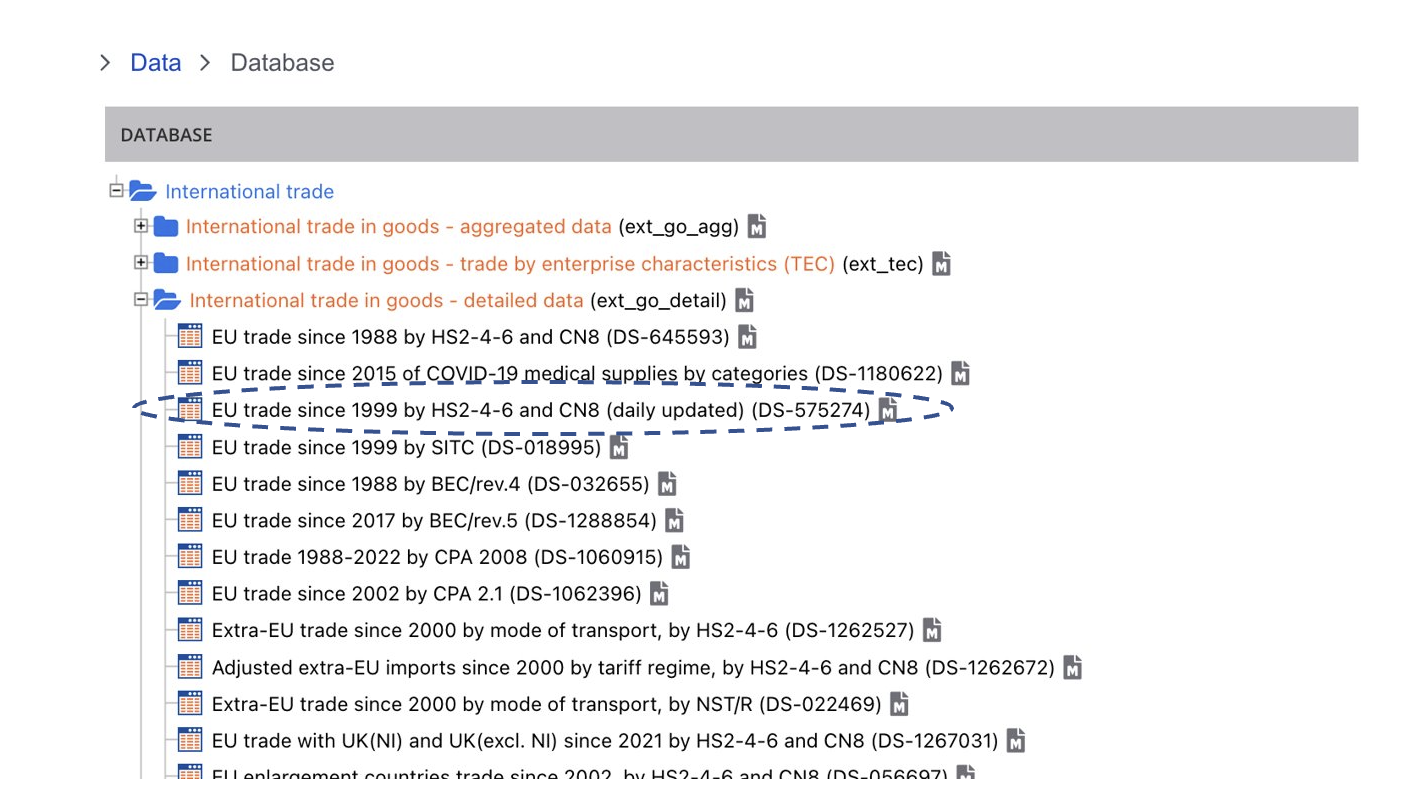

In [260]:
from IPython.display import Image
Image(filename='trade_data/trade_database.png')

The data contains among others, the following four fields for the case:
- TIME_PERIOD: the month in which the goods were imported
- declarant: The country to where the goods are imported (3 = The Netherlands)
- partner: The country where the goods originate from.
- indicators: Indicates whether the value is the Quantity or the Value measure
- OBS_Value: the field that indicates the actual value.

### You can find the product codes here:

https://ec.europa.eu/eurostat/ramon/nomenclatures/index.cfm?TargetUrl=LST_NOM_DTL&StrNom=CN_2022&StrLanguageCode=EN&IntPcKey=&StrLayoutCode=HIERARCHIC&IntCurrentPage=1

Query for sunflower oil:

https://ec.europa.eu/eurostat/ramon/nomenclatures/index.cfm?TargetUrl=LST_NOM_DTL&StrNom=CN_2022&StrLanguageCode=EN&IntPcKey=49230475&StrLayoutCode=HIERARCHIC

#### View of the data:

In [395]:
import pandas as pd
import datetime

trade_data = pd.read_csv("trade_data/sunflower_oil.csv")
trade_data["TIME_PERIOD"] = pd.to_datetime(trade_data["TIME_PERIOD"], format = '%Y-%m').dt.date
trade_data = trade_data.rename(columns={"partner": "PARTNER_codes", "declarant": "DECLARANT_codes"})
trade_data = trade_data.drop_duplicates()
#trade_data = trade_data.dropna()


In [396]:
products = trade_data["product"].drop_duplicates().to_list()
product_filter = products[0]

print(products)
print(product_filter)

[15121191, 15121990]
15121191


#### We've also included a file with the labels for all the partner countries:

In [397]:
partner_countries = pd.read_csv("trade_data/partners.csv", sep = ";")
print(partner_countries.head(5))

   PARTNER_codes  PARTNER_Labels
0              1          France
1              3     Netherlands
2              4         Germany
3              5           Italy
4              6  United Kingdom


#### View of the data:

In [398]:
trade_data = pd.merge(trade_data, partner_countries, on = ['PARTNER_codes'], how = 'inner')

print(trade_data.head(5))

               DATAFLOW        LAST UPDATE freq  DECLARANT_codes  \
0  ESTAT:DS-057380(1.0)  06/01/23 14:01:00    M                3   
1  ESTAT:DS-057380(1.0)  06/01/23 14:01:00    M                3   
2  ESTAT:DS-057380(1.0)  06/01/23 14:01:00    M                3   
3  ESTAT:DS-057380(1.0)  06/01/23 14:01:00    M                3   
4  ESTAT:DS-057380(1.0)  06/01/23 14:01:00    M                3   

   PARTNER_codes   product  flow  stat_regime    indicators TIME_PERIOD  \
0              1  15121191     1            1  QUANTITY_TON  2005-01-01   
1              1  15121191     1            1  QUANTITY_TON  2005-02-01   
2              1  15121191     1            1  QUANTITY_TON  2005-03-01   
3              1  15121191     1            1  QUANTITY_TON  2005-04-01   
4              1  15121191     1            1  QUANTITY_TON  2005-05-01   

   OBS_VALUE  OBS_FLAG PARTNER_Labels  
0     1295.6       NaN         France  
1     1027.2       NaN         France  
2     5900.8       N

In [399]:

trade_data_pivot = trade_data.pivot(index=['PARTNER_Labels', 'TIME_PERIOD', 'product'], 
                              columns='indicators', 
                              values=['OBS_VALUE'])

trade_data_pivot.columns = trade_data_pivot.columns.map('_'.join)
trade_data_pivot = trade_data_pivot.reset_index()
trade_data_pivot = trade_data_pivot.dropna()

In [400]:
print(trade_data_pivot.head(5))

  PARTNER_Labels TIME_PERIOD   product  OBS_VALUE_QUANTITY_TON  \
0      Argentina  2005-01-01  15121191                 21086.3   
1      Argentina  2005-02-01  15121191                 18325.9   
2      Argentina  2005-03-01  15121191                 25661.5   
3      Argentina  2005-04-01  15121191                 33839.2   
4      Argentina  2005-05-01  15121191                 41051.1   

   OBS_VALUE_VALUE_1000EURO  
0                  10489.97  
1                   8946.33  
2                  12741.53  
3                  16665.38  
4                  19921.35  


# Graphical Inspection Data

In [401]:
date_filter = datetime.date(year=2018,month=1,day=1)

#### Global Graph:

In [402]:
trade_data_total = trade_data_pivot\
.groupby(['product', 'TIME_PERIOD']).agg({'OBS_VALUE_QUANTITY_TON': 'sum', 
                                          'OBS_VALUE_VALUE_1000EURO': 'sum'})

trade_data_total = trade_data_total.reset_index()
trade_data_total['price'] = trade_data_total['OBS_VALUE_VALUE_1000EURO']/trade_data_total['OBS_VALUE_QUANTITY_TON']


print(trade_data_total.head(5))

    product TIME_PERIOD  OBS_VALUE_QUANTITY_TON  OBS_VALUE_VALUE_1000EURO  \
0  15121191  2005-01-01                 24244.3                  12680.29   
1  15121191  2005-02-01                 20416.3                  10559.71   
2  15121191  2005-03-01                 33443.6                  18135.15   
3  15121191  2005-04-01                 39508.4                  20341.73   
4  15121191  2005-05-01                 42191.2                  20818.87   

      price  
0  0.523021  
1  0.517220  
2  0.542261  
3  0.514871  
4  0.493441  


<AxesSubplot: xlabel='TIME_PERIOD'>

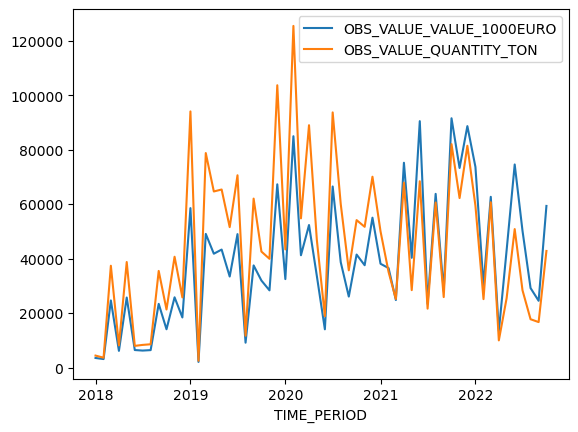

In [403]:
trade_data_total[(trade_data_total['TIME_PERIOD']>=date_filter)&
                (trade_data_total['product']==product_filter)]\
[['TIME_PERIOD', 'OBS_VALUE_VALUE_1000EURO', 'OBS_VALUE_QUANTITY_TON']]\
.set_index('TIME_PERIOD').plot()

<AxesSubplot: xlabel='TIME_PERIOD'>

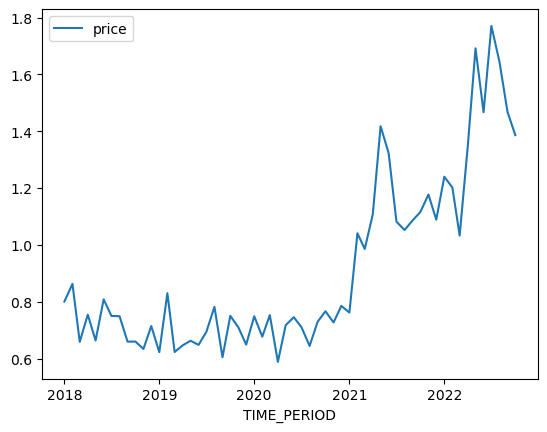

In [404]:
trade_data_total[(trade_data_total['TIME_PERIOD']>=date_filter)&
                (trade_data_total['product']==product_filter)]\
[['TIME_PERIOD', 'price']]\
.set_index('TIME_PERIOD').plot()

#### Graphs of specific Countries:

<AxesSubplot: xlabel='TIME_PERIOD'>

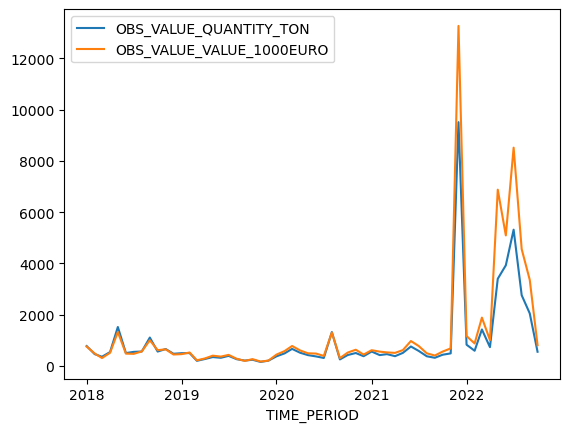

In [405]:
trade_data_pivot[(trade_data_pivot['PARTNER_Labels']=='Germany')&
                 (trade_data_pivot['TIME_PERIOD']>=date_filter)&
                (trade_data_pivot['product']==product_filter)]\
[['TIME_PERIOD', 'OBS_VALUE_QUANTITY_TON', 'OBS_VALUE_VALUE_1000EURO']]\
.set_index('TIME_PERIOD').plot()



<AxesSubplot: xlabel='TIME_PERIOD'>

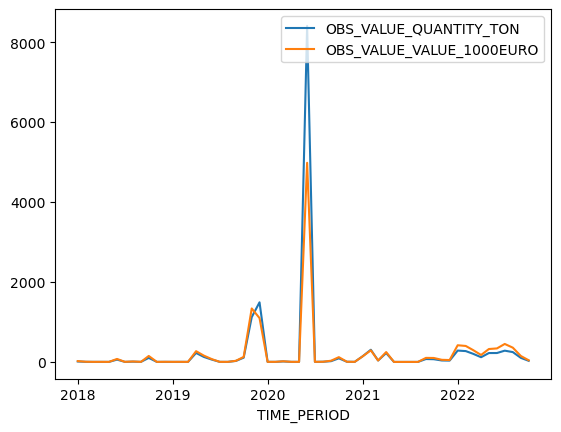

In [406]:
trade_data_pivot[(trade_data_pivot['PARTNER_Labels']=='Belgium')&
                 (trade_data_pivot['TIME_PERIOD']>=date_filter)&
                (trade_data_pivot['product']==product_filter)]\
[['TIME_PERIOD', 'OBS_VALUE_QUANTITY_TON', 'OBS_VALUE_VALUE_1000EURO']]\
.set_index('TIME_PERIOD').plot()


<AxesSubplot: xlabel='TIME_PERIOD'>

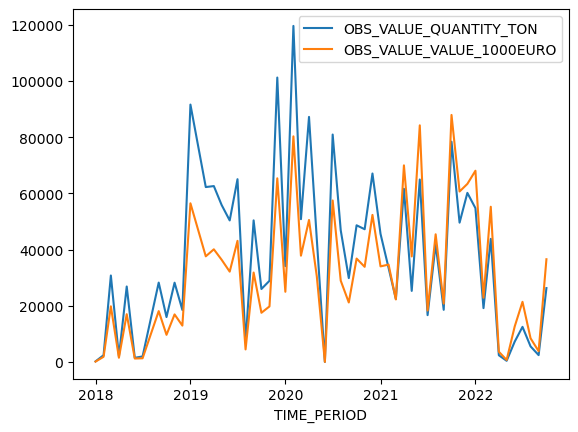

In [407]:
trade_data_pivot[(trade_data_pivot['PARTNER_Labels']=='Ukraine')&
                 (trade_data_pivot['TIME_PERIOD']>=date_filter)&
                (trade_data_pivot['product']==product_filter)]\
[['TIME_PERIOD', 'OBS_VALUE_QUANTITY_TON', 'OBS_VALUE_VALUE_1000EURO']]\
.set_index('TIME_PERIOD').plot()
